In [12]:
!pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.9 MB/s eta 0:00:00


In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
from dtaidistance import dtw
from fastdtw import fastdtw

In [14]:
segment_dir = 'segment'

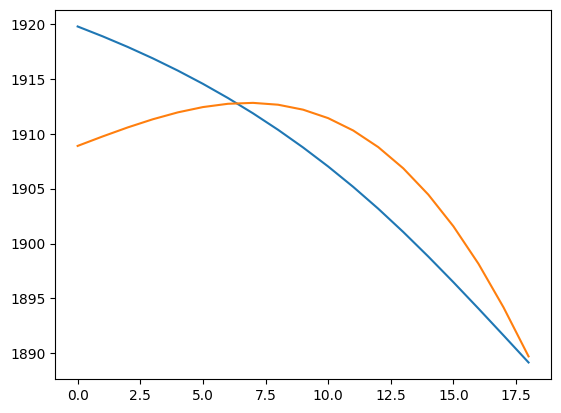

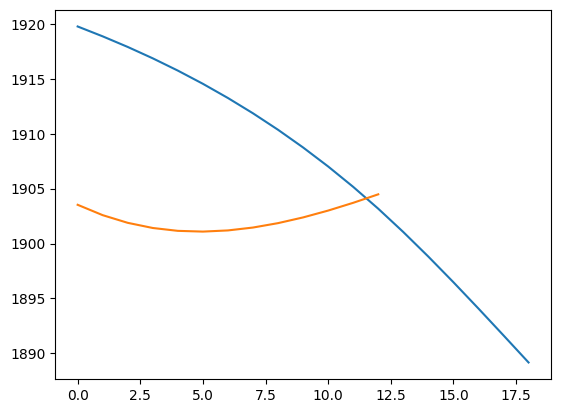

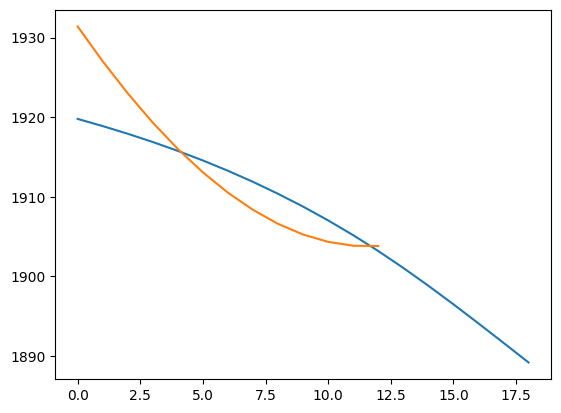

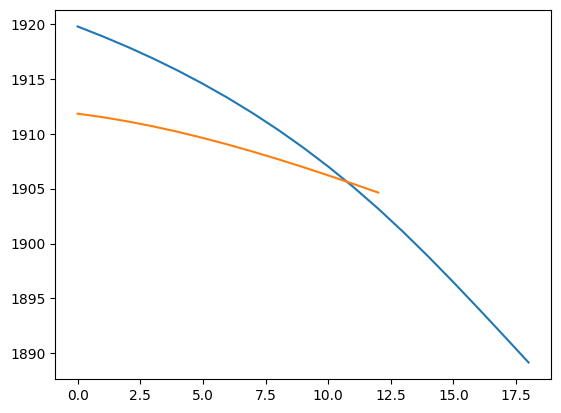

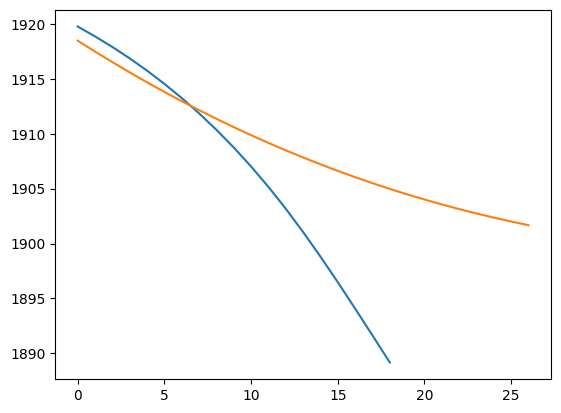

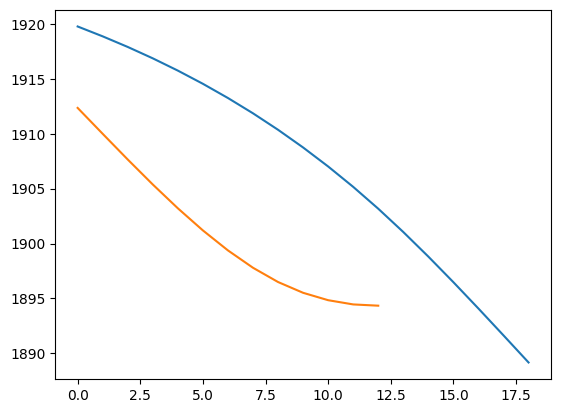

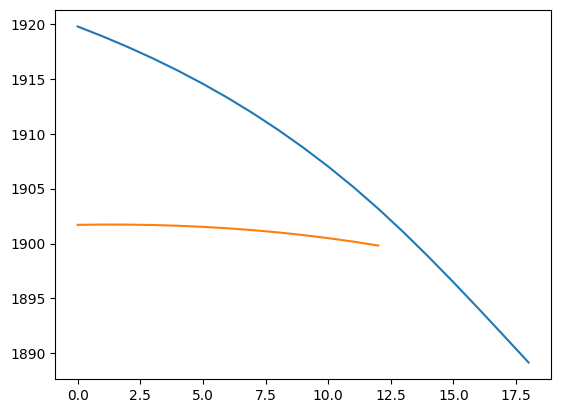

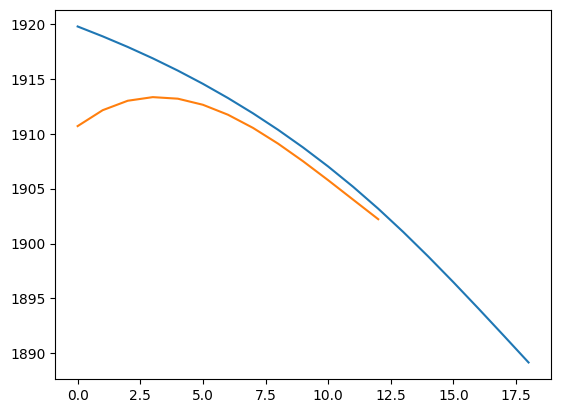

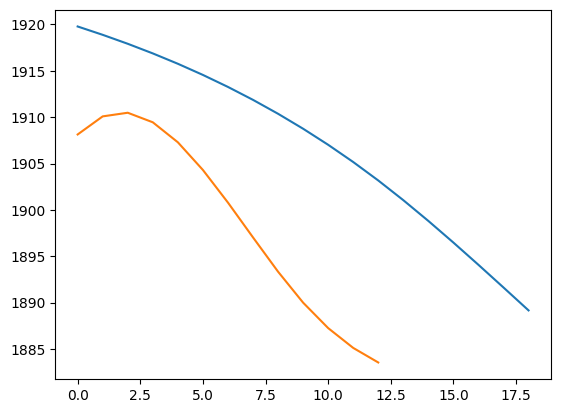

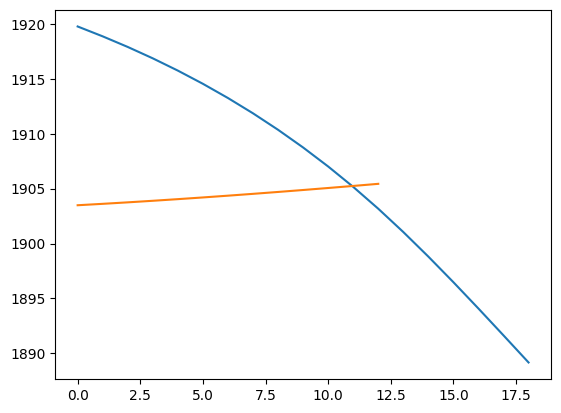

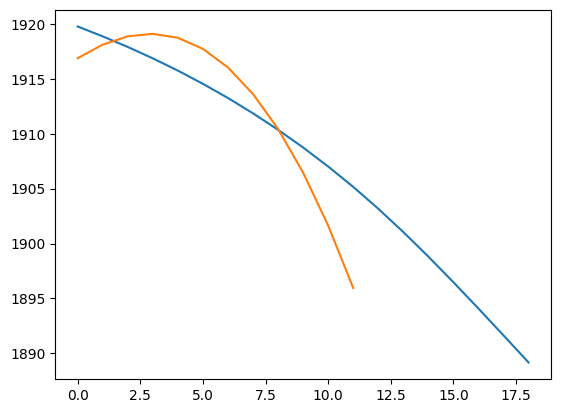

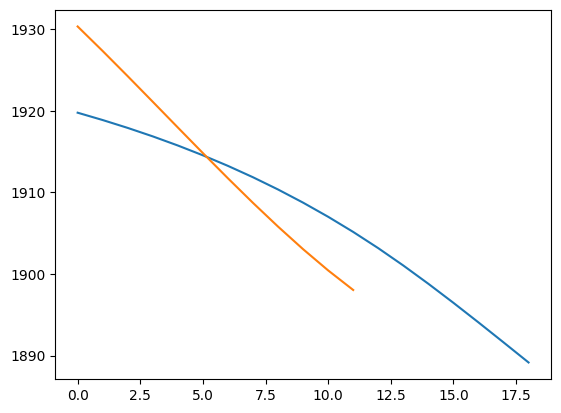

In [48]:
j = 0
for segment1_name in os.listdir(segment_dir):
    if j < 32:
        j += 1
        continue
    x = np.load(os.path.join(segment_dir, segment1_name))

    i = 0
    cost = np.inf
    for segment2_name in os.listdir(segment_dir):
        
        
        y = np.load(os.path.join(segment_dir, segment2_name))

        if abs(len(x) - len(y)) > 10:
            continue

        if abs(np.std(x) - np.std(y)) > 10:
            continue

        distance = librosa.sequence.dtw(x, y, subseq=True, global_constraints=True, band_rad=0.1, backtrack=False)
        #distance = 
        distance[distance == np.inf] = 0
        if np.any(distance > 100):
            continue
        if distance[-1, -1] < 200 and distance[-1, -1] != 0:
            plt.plot(x)
            plt.plot(y)
            plt.show()
        if cost > distance[-1, -1] and distance[-1, -1] != 0:
            cost = min(cost, distance[-1, -1])
            miny = y

    
    break